# Online Sales Analysis:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Python_Diwali_Sales_Analysis\\Diwali Sales Data.csv",encoding='unicode_escape')

In [ ]:
df.head(10)

In [ ]:
df.info()

# Data Cleaning:

In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df


In [ ]:
#check for null values:
pd.isnull(df).sum()

In [ ]:
df.dropna(inplace=True)

In [24]:
df.shape
# here we can see that 12 rows are dropped which had null values

(11239, 13)

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [26]:
# above we can see that amount is float dataytpe,so we will make it to int:
df['Amount']=df['Amount'].astype('int')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis:

# Gender

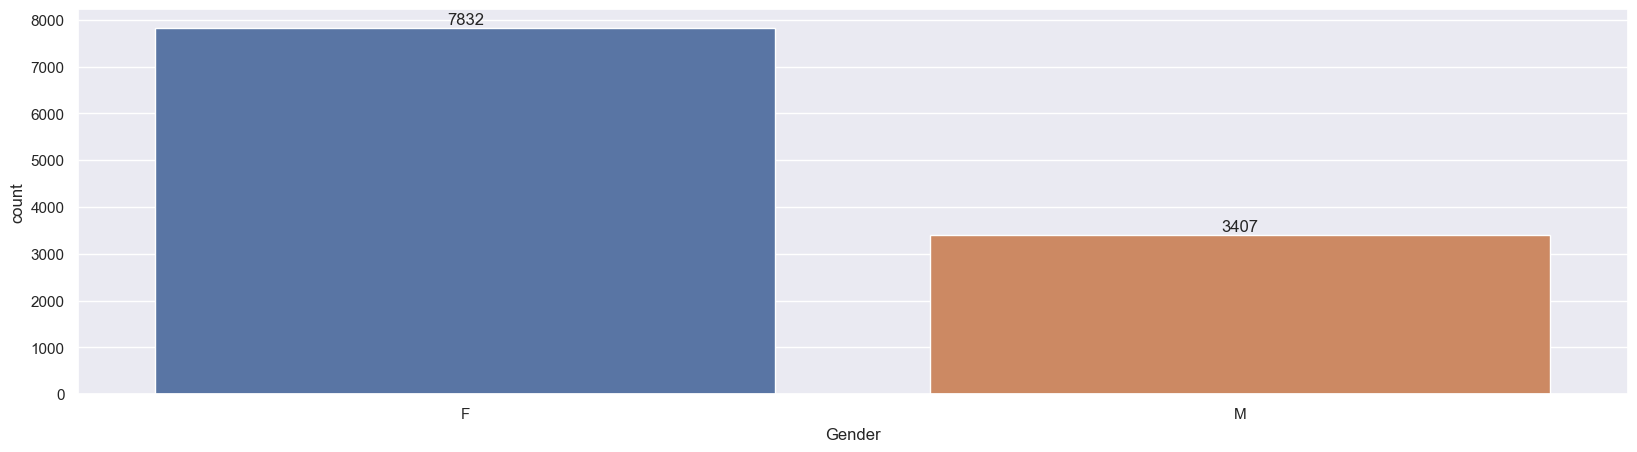

In [30]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

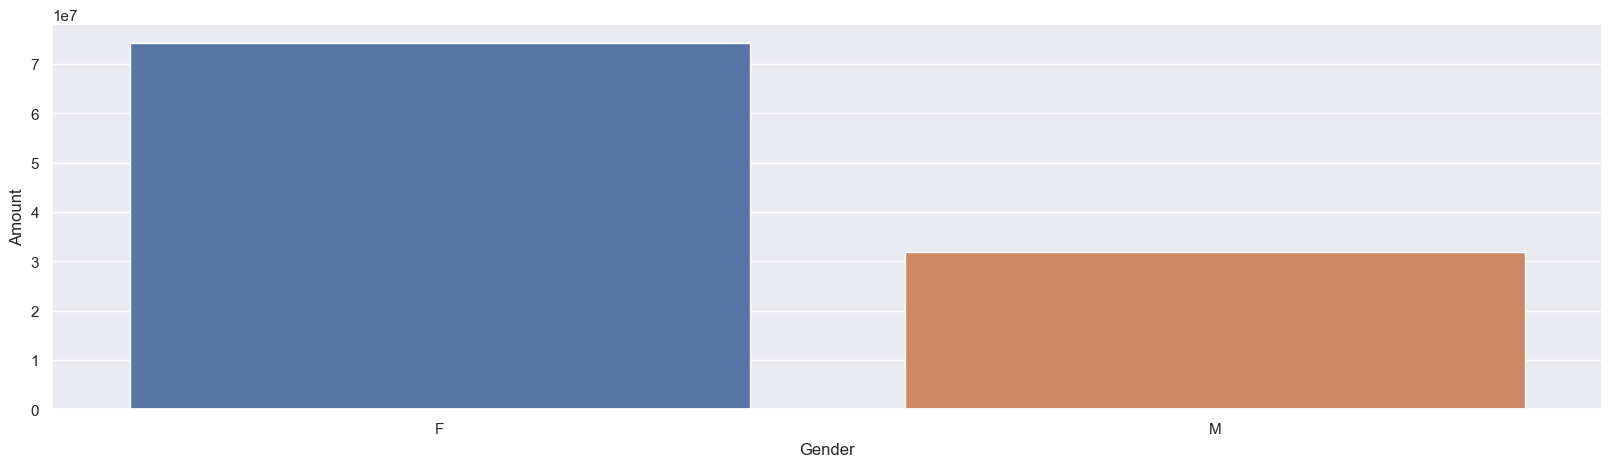

In [31]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

# Observation:

From above graphs we can see that most of the buyers are Females,
And even purchasing power of Females are greater than Men.

# Age:

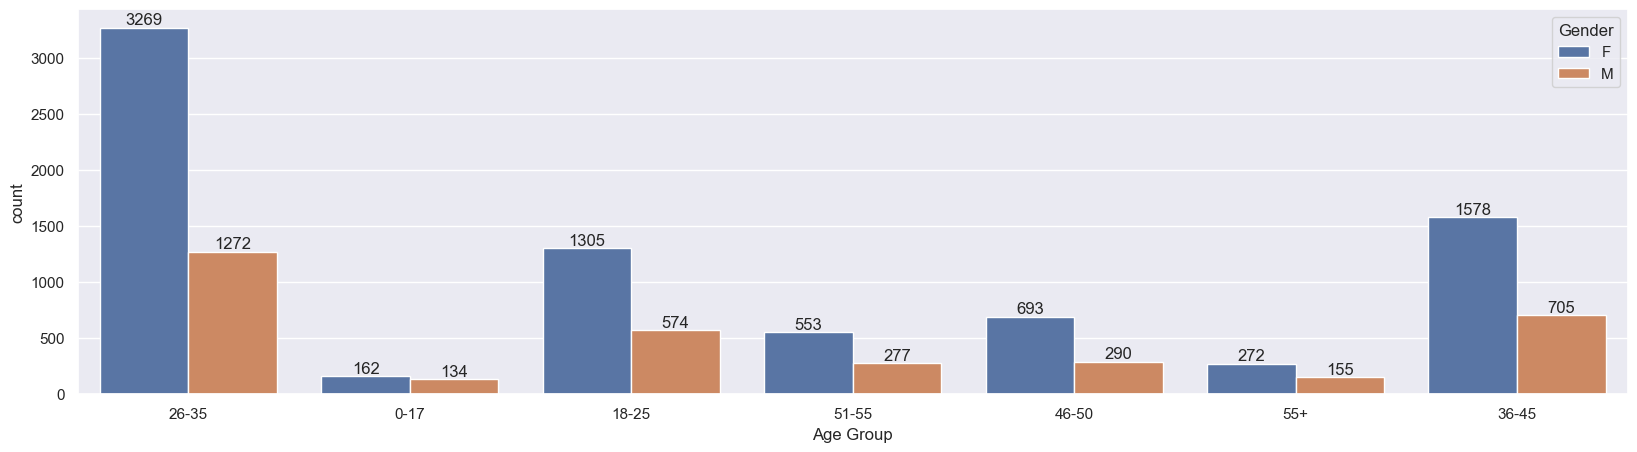

In [32]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

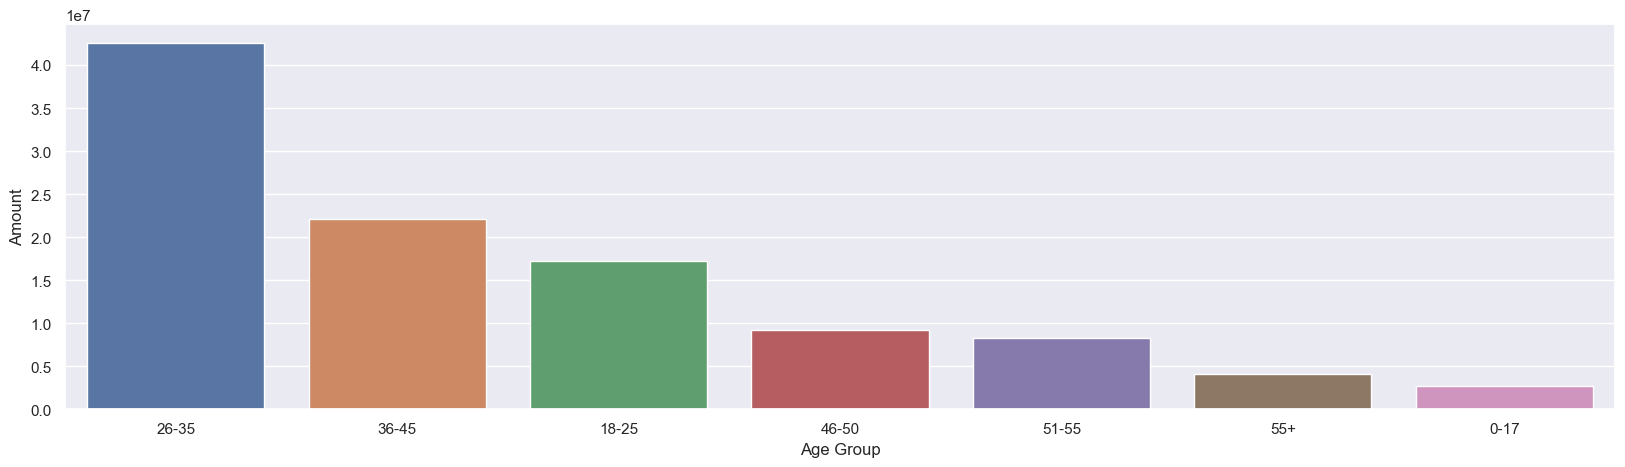

In [33]:
# Total Amount Vs Age Group:

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data =sales_age)

# Observation:

From above graphs we can see that mots of the buyers are of age group between 26-35 yrs female.

# State:

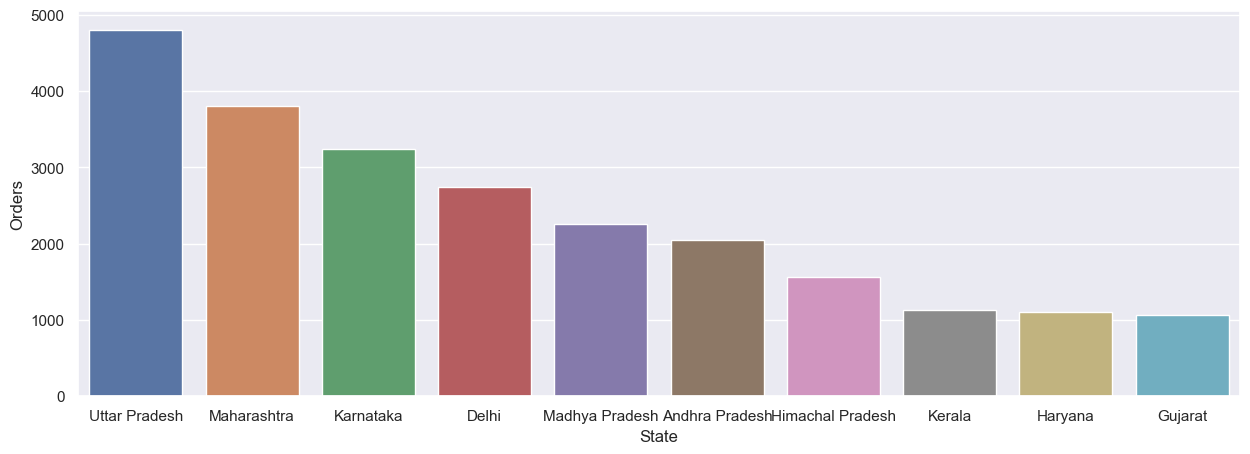

In [41]:
# Top 10 states orders:

sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')
plt.show()


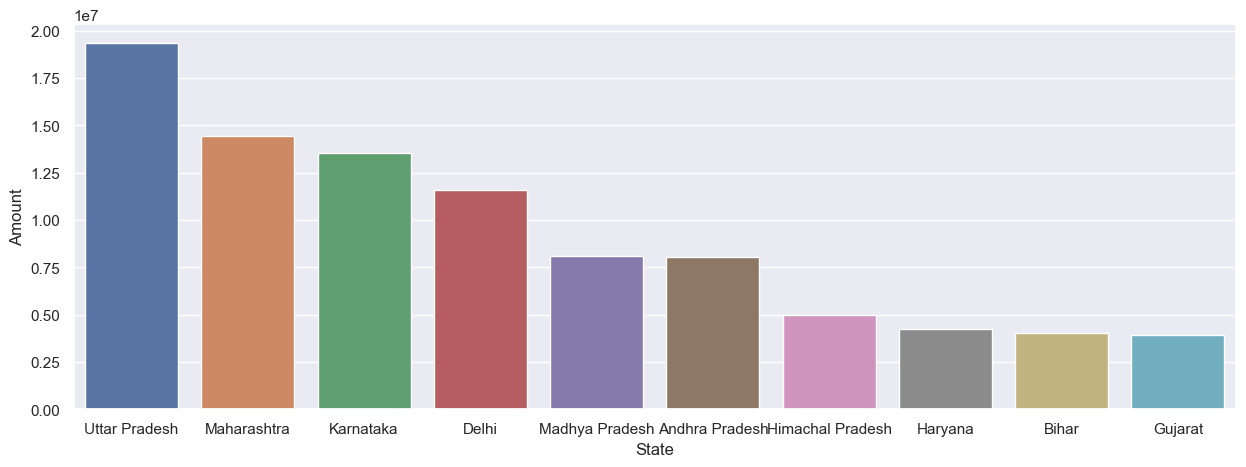

In [42]:
# Total amount/Sales from top 10 states:

sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Amount')
plt.show()

# Observation:

From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh followed by Maharashtra and Karnataka 
respectively,But Total sales/Amount is From Up,Karnataka and then Maharastra.

# Occupation:

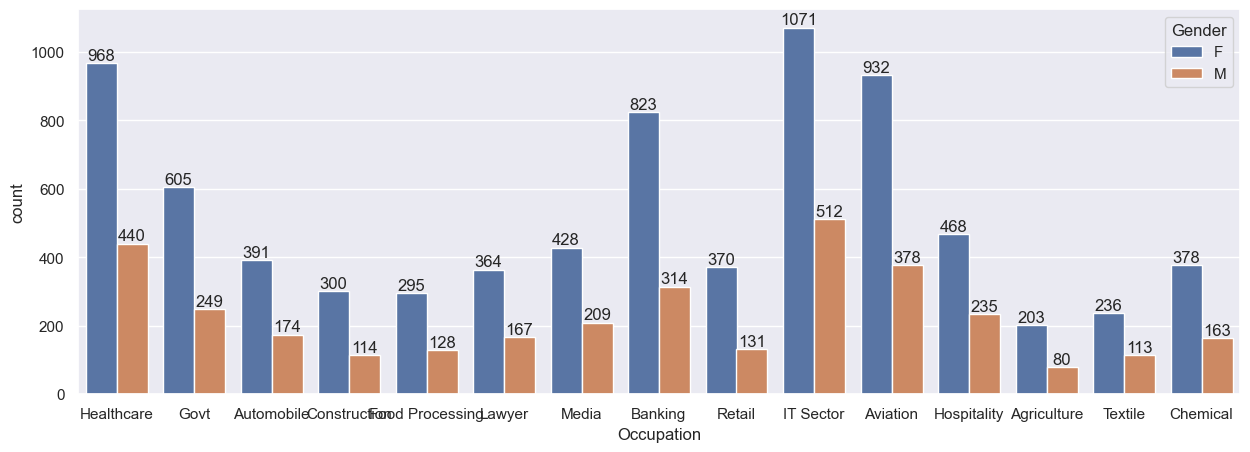

In [36]:
ax=sns.countplot(data=df,x='Occupation',hue='Gender')

sns.set(rc={'figure.figsize': (22,5)})

for bars in ax.containers:
    ax.bar_label(bars)
    

# Observation:

Form above graphs we can see that most of the buyers are working in IT,Aviation and Healthcare.

# Product Category:

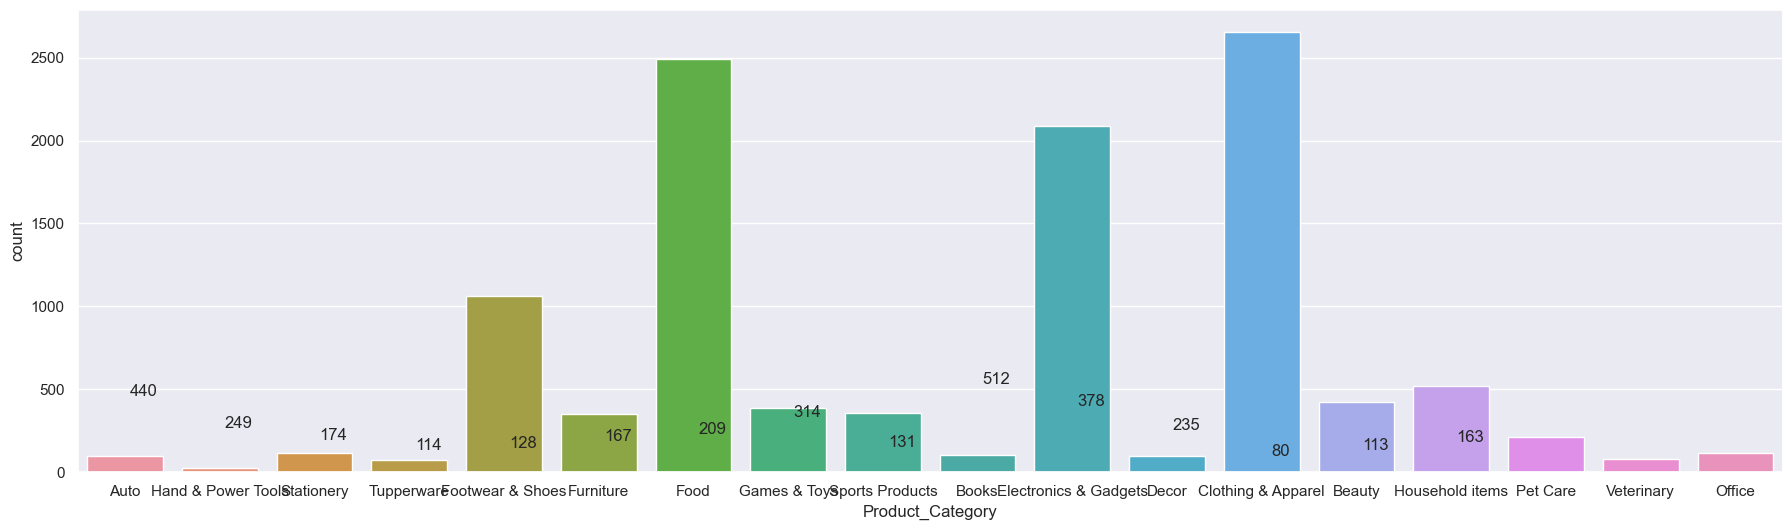

In [37]:
sns.set(rc={'figure.figsize':(22,6)})
ax=sns.countplot(data=df,x='Product_Category')

for bar in ax.containers:
    ax.bar_label(bars)
    

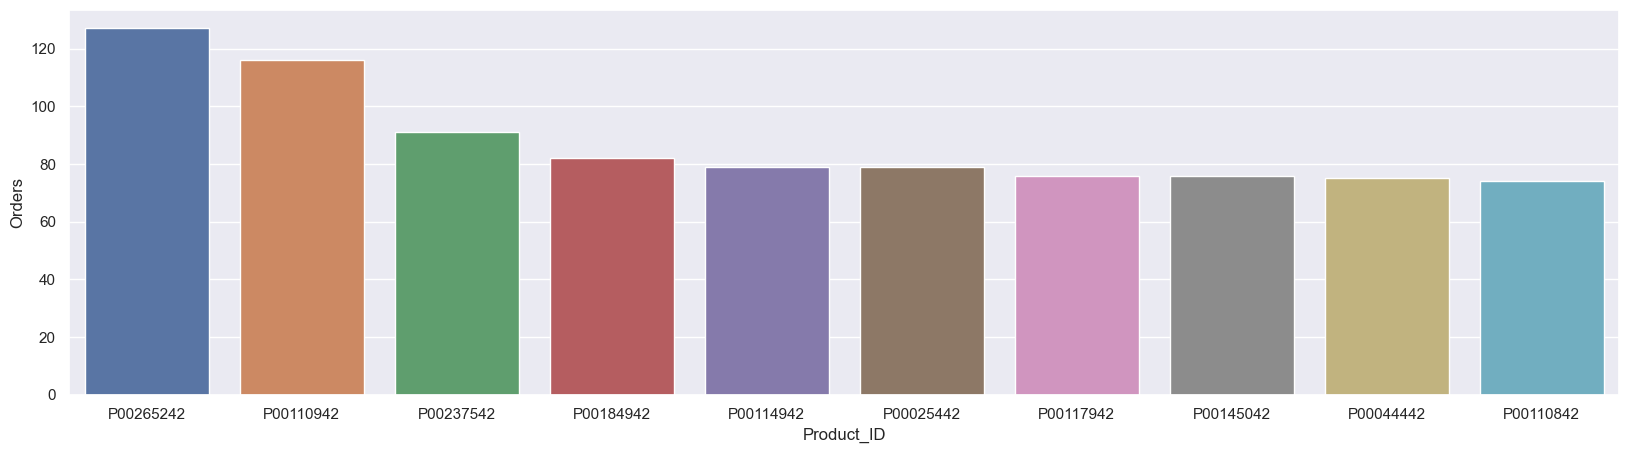

In [43]:
sales_state=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')
plt.show()

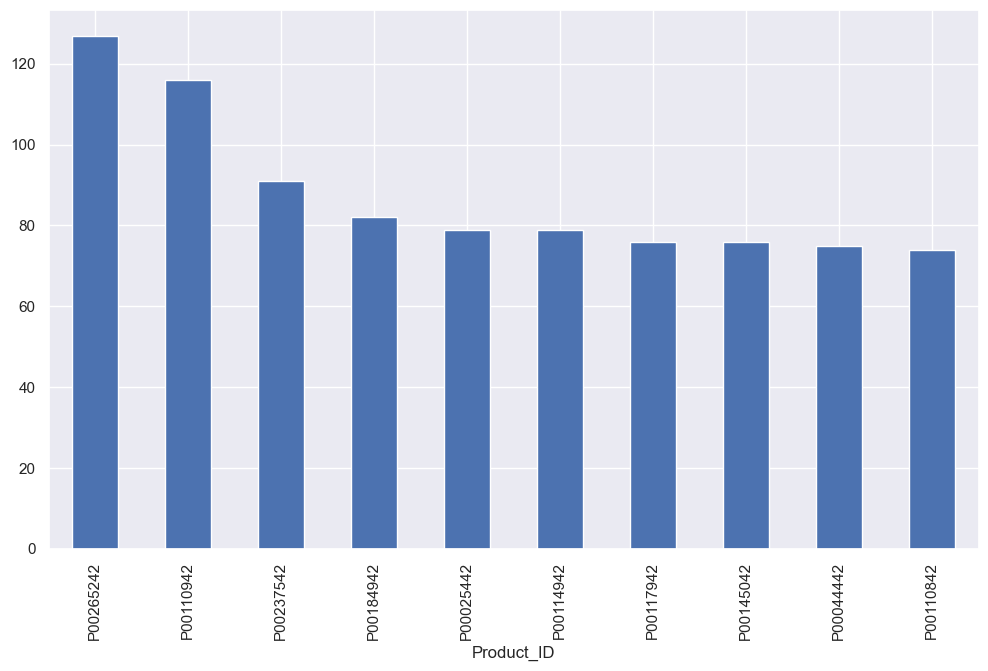

In [45]:
# Top 10 most sold products(same thing as above) but done in a different way:

fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

# Conclusion:

We can conclude that married woman of Age Gorup between 25-35yrs from Maharashtra,Karnataka working in IT,Aviation
and Healthcare are more likely to buy products like:Footware and Electronics category.